In [1]:
# Import des bibliothèques nécessaires
from sklearn.datasets import fetch_20newsgroups
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import normalized_mutual_info_score, adjusted_rand_score
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [42]:
# Définition de la fonction de réduction de dimension avec t-SNE
def dim_red(mat, p ):
    '''
    Perform dimensionality reduction

    Input:
    -----
        mat : NxM list 
        p : number of dimensions to keep 
        method: Dimensionality reduction method (e.g., 'TSNE')
        tsne_params: Parameters for t-SNE (dictionary)
    Output:
    ------
        red_mat : NxP list such that p << m
    '''
    reducer = TSNE(n_components=p)
    red_mat = reducer.fit_transform(mat)

    return red_mat

In [34]:
# Définition de la fonction de clustering avec K-Means
def clust(mat, k):
    '''
    Perform clustering using K-Means

    Input:
    -----
        mat : input list 
        k : number of clusters
    Output:
    ------
        pred : list of predicted labels
    '''
    kmeans = KMeans(n_clusters=k, random_state=42)
    pred = kmeans.fit_predict(mat)
    
    return pred

In [26]:
# Chargement des données
ng20 = fetch_20newsgroups(subset='all')
corpus = ng20.data[:2000]
labels = ng20.target[:2000]
k = len(set(labels))

In [27]:
# Embedding
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')
embeddings = model.encode(corpus)

In [38]:
# Perform dimensionality reduction with t-SNE
tsne_dimensions = 3  # Adjust based on your preference
red_emb = dim_red(embeddings, tsne_dimensions)

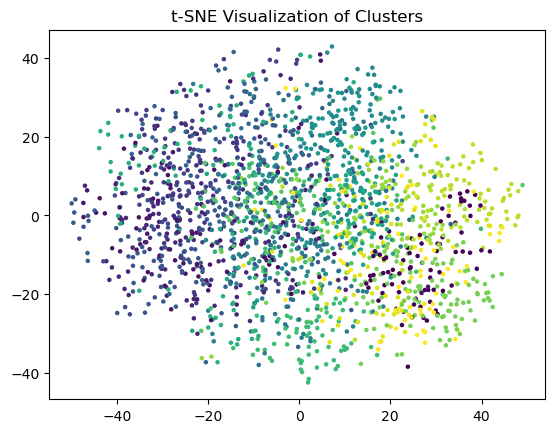

In [39]:
# Visualize the clusters
plt.scatter(red_emb[:, 0], red_emb[:, 1], c=labels, cmap='viridis', s=5)
plt.title('t-SNE Visualization of Clusters')
plt.show()


In [40]:
# Perform clustering
pred = clust(red_emb, k)



C:\Users\thinkpad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [41]:
# Evaluate clustering results
nmi_score = normalized_mutual_info_score(pred, labels)
ari_score = adjusted_rand_score(pred, labels)

# Print results
print(f'Method: t-SNE + K-Means\nNMI: {nmi_score:.2f}\nARI: {ari_score:.2f}\n')

Method: t-SNE + K-Means
NMI: 0.40
ARI: 0.22



In [43]:
nmi_scores = []
ari_scores = []


num_iterations=3
for _ in range(num_iterations):
    # Perform dimensionality reduction
    reduced_embeddings = dim_red(embeddings, tsne_dimensions)

    # Perform clustering
    predicted_labels = clust(reduced_embeddings, len(set(labels)))

    # Evaluate clustering results
    nmi_score = normalized_mutual_info_score(predicted_labels, labels)
    ari_score = adjusted_rand_score(predicted_labels, labels)
    
    nmi_scores.append(nmi_score)
    ari_scores.append(ari_score)

mean_nmi_score = np.mean(nmi_scores)
mean_ari_score = np.mean(ari_scores)

print(f'Mean NMI: {mean_nmi_score:.4f} \nMean ARI: {mean_ari_score:.4f}')



C:\Users\thinkpad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thinkpad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thinkpad\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Mean NMI: 0.4063 
Mean ARI: 0.2355
